In [2]:
library(lme4)
library(e1071) 
library(parameters) 

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,High,0.1,0.0,0.00,0.25,1.0000000
2,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,Low,0.1,0.1,0.50,0.50,0.5000000
3,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,High,0.2,0.2,0.25,0.50,0.5000000
4,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,Low,0.3,0.6,0.25,0.00,0.3333333
5,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,High,0.5,0.0,0.25,0.00,1.0000000
6,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,Low,0.5,0.4,0.25,0.25,0.5555556


In [23]:
md.denies = lmer(Denies ~ evidence * condition + (1 |user_id), data = data)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -74.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8856 -0.5771 -0.2504  0.2946  3.5650 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 user_id  (Intercept) 4.017e-15 6.338e-08
 Residual             3.366e-02 1.835e-01
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.08000    0.02735   2.925
evidenceLow                     0.18122    0.03788   4.784
conditionTreatment              0.02588    0.04169   0.621
evidenceLow:conditionTreatment  0.05884    0.05775   1.019

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.722              
cndtnTrtmnt -0.656  0.474       
evdncLw:cnT  0.474 -0.656 -0.722
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


In [4]:
p_value_satterthwaite(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),3.940283e-03
evidenceLow,3.855530e-06
conditionTreatment,5.355754e-01
evidenceLow:conditionTreatment,3.097603e-01


Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


## linearity and constant variance 

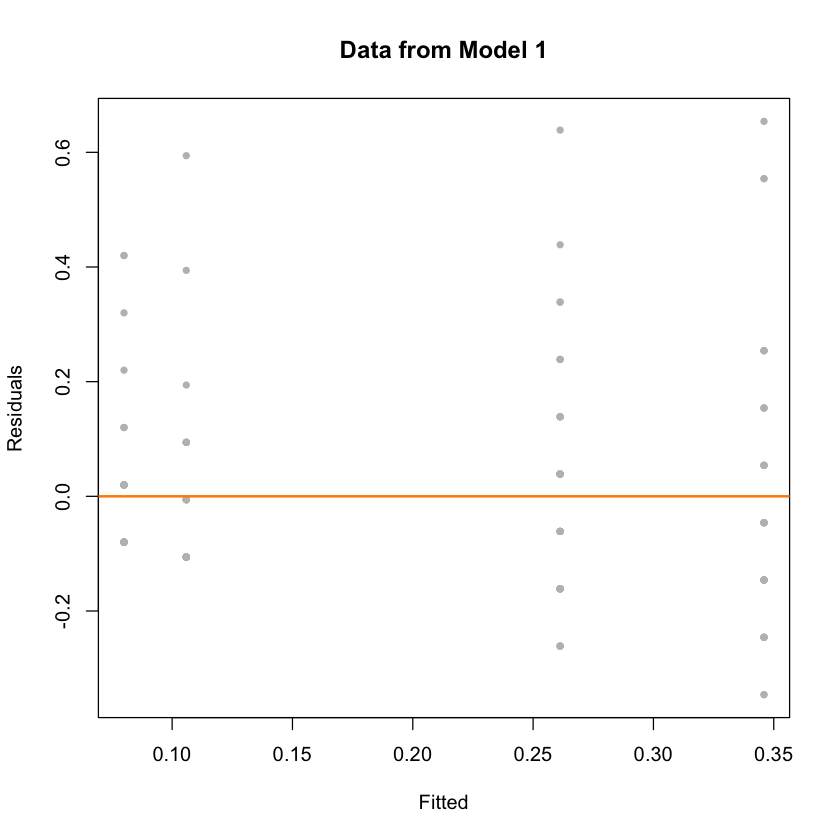

In [5]:
plot(fitted(md.denies), resid(md.denies), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

## Normality

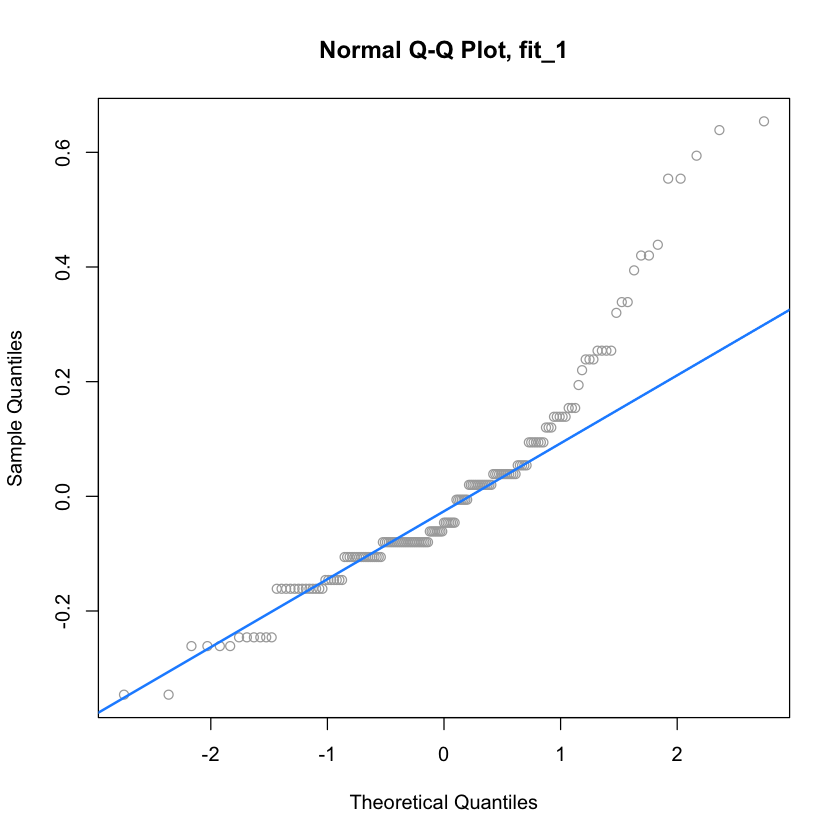

In [6]:
qqnorm(resid(md.denies), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.denies), col = "dodgerblue", lwd = 2)

In [7]:
shapiro.test(resid(md.denies))


	Shapiro-Wilk normality test

data:  resid(md.denies)
W = 0.89489, p-value = 1.915e-09


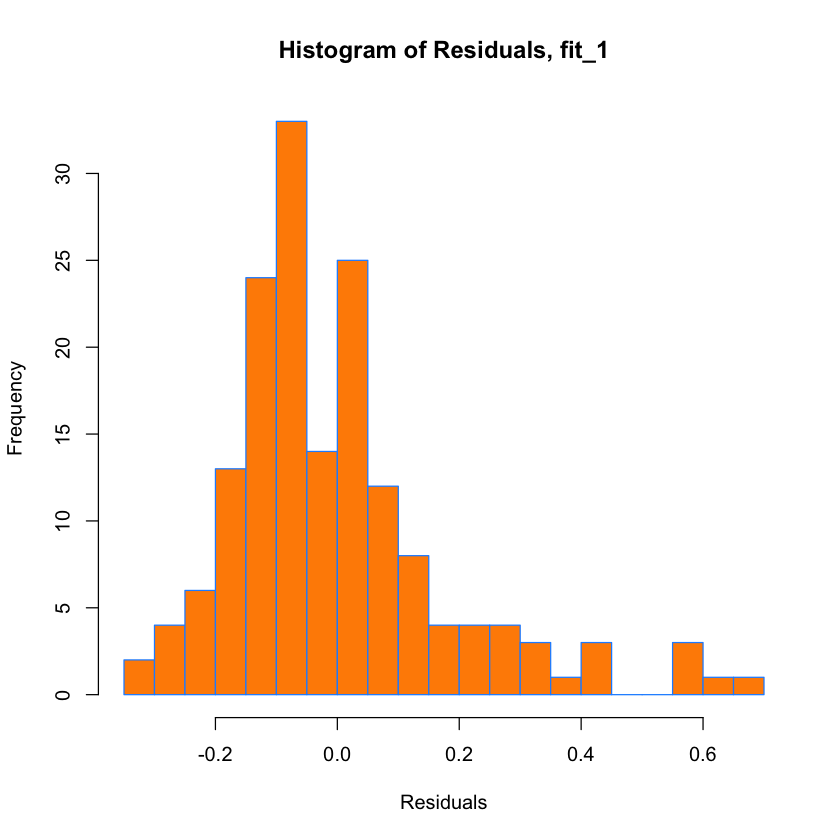

In [8]:
hist(resid(md.denies),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)